# **Load and Explore the Dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_theme()

In [3]:
# Load the Dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [4]:
# Display basic information about the dataset
print("\nDataset Shape:", df.shape)
print("\nFeature Names:", iris.feature_names)
print("\nTarget Names:", iris.target_names)


Dataset Shape: (150, 5)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target Names: ['setosa' 'versicolor' 'virginica']


In [5]:
# Display the first few rows
print("\nFirst few rows of the dataset:")
display(df.head())


First few rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Basic statistics
print("\nBasic statistics of the dataset:")
display(df.describe())


Basic statistics of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Check for missing values
print("\nMissing values in the dataset:")
display(df.isnull().sum())


Missing values in the dataset:


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


Text(0.5, 1.0, 'Distribution of Iris Features')

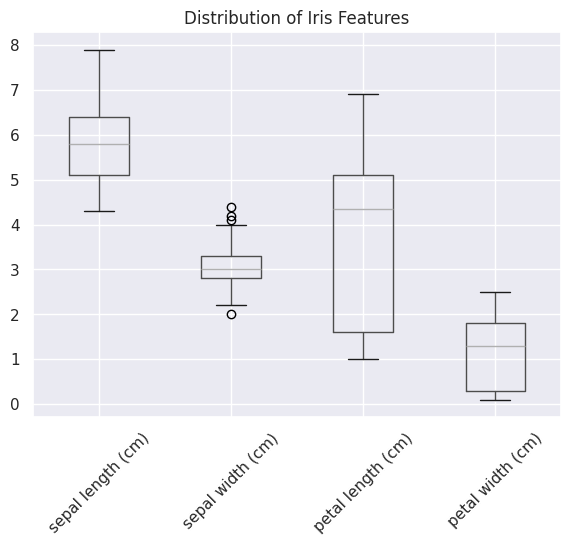

In [8]:
# Data distribution visualization
plt.figure(figsize=(15, 5))

# Create box plots for each feature
plt.subplot(1, 2, 1)
df.boxplot(column=iris.feature_names)
plt.xticks(rotation=45)
plt.title('Distribution of Iris Features')

<Figure size 1000x800 with 0 Axes>

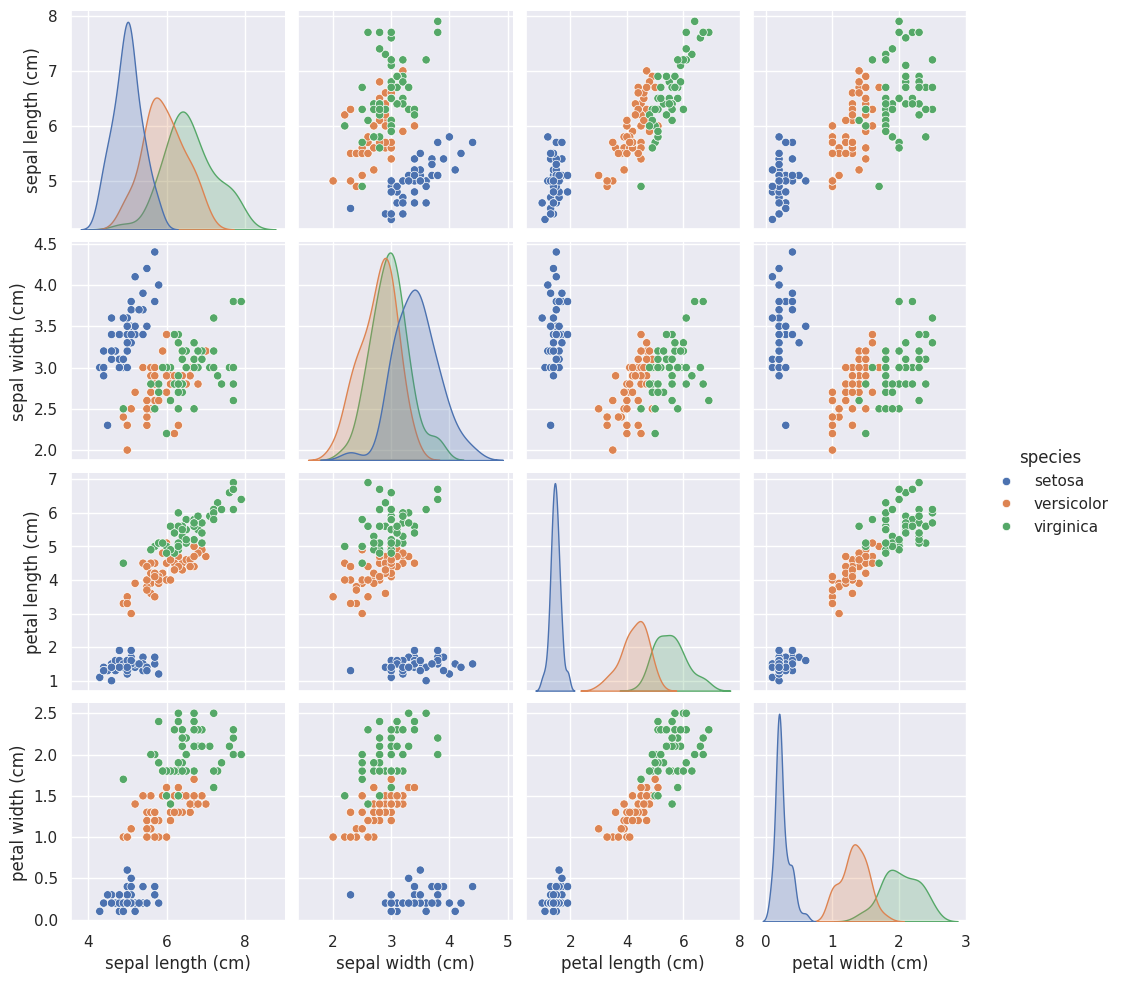

In [9]:
# Pairplot to show relationships between features
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='species', diag_kind='kde')
plt.show()

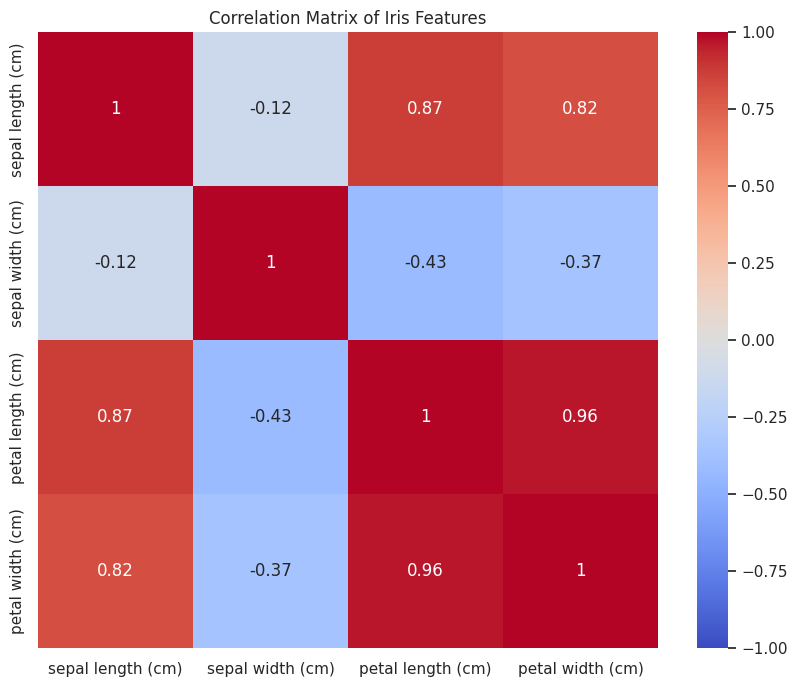

In [10]:
# Correlation analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df[iris.feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Iris Features')
plt.show()

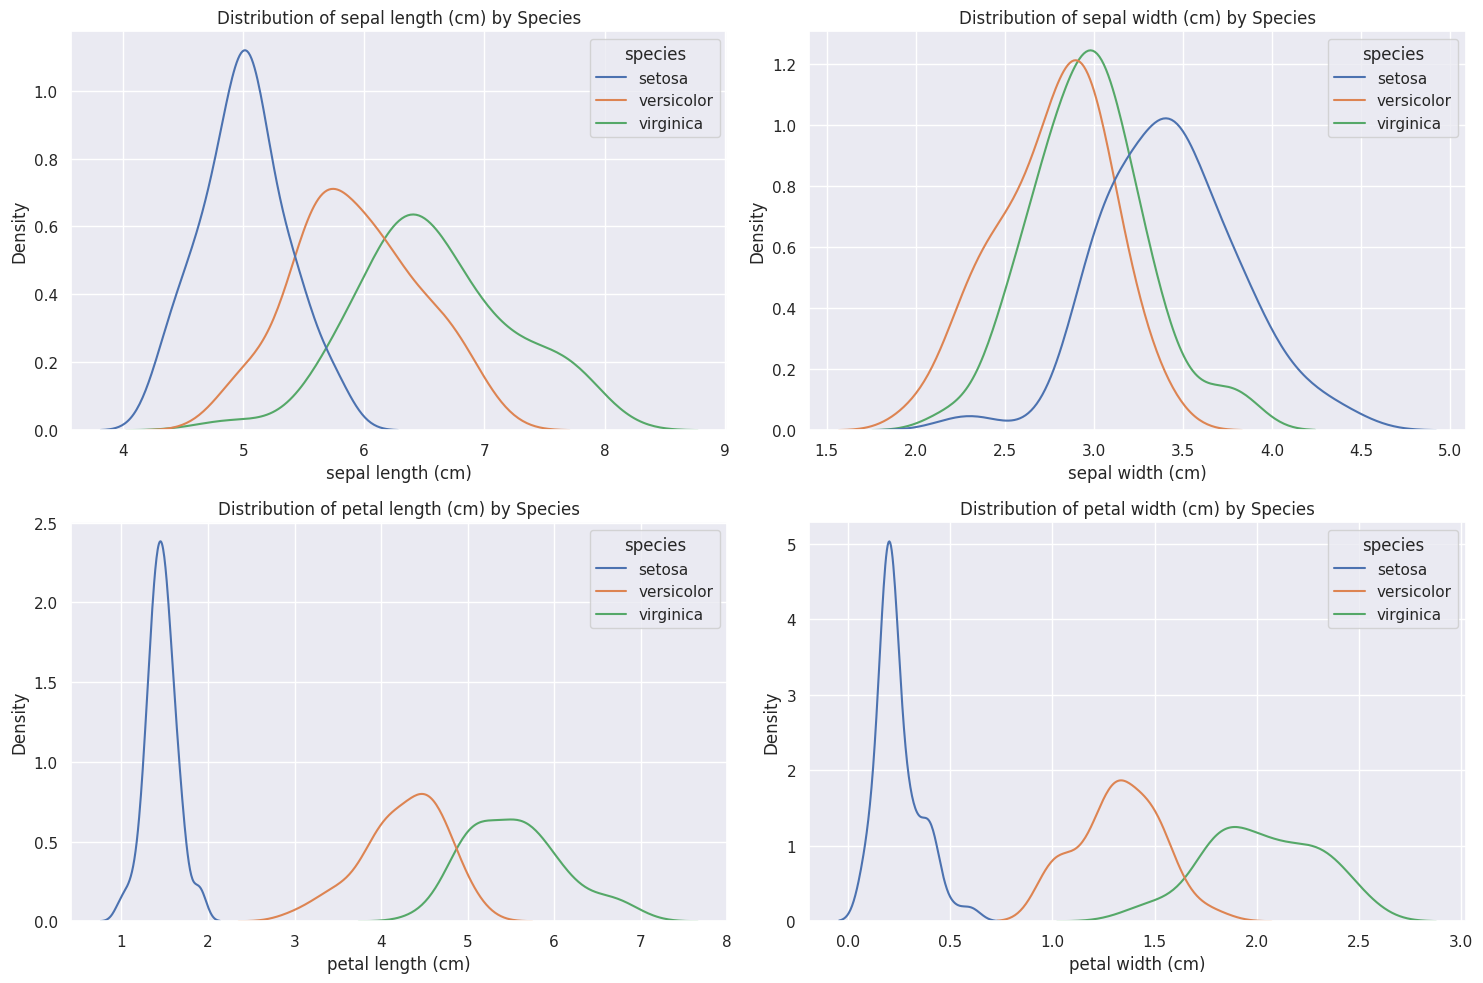

In [11]:
# Feature distributions by species
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris.feature_names, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=df, x=feature, hue='species', common_norm=False)
    plt.title(f'Distribution of {feature} by Species')
plt.tight_layout()
plt.show()

# **Data Preprocessing**

### **Drop Duplicate values**

In [12]:
#preprocess the data
X = iris.data
y = iris.target

In [13]:
# Convert to DataFrame for easier duplicate handling
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

In [14]:
# Check for duplicates
n_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows found: {n_duplicates}")

if n_duplicates > 0:
    df = df.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {df.shape}")


Number of duplicate rows found: 1
Dataset shape after removing duplicates: (149, 5)


In [15]:
# Split features and target after duplicate removal
X = df[iris.feature_names].values
y = df['target'].values

### **Feature Scaling**

In [16]:
# Scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Build the Machine Learning Model**

### **cross validation**

In [17]:
# Initialize models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'k-NN': KNeighborsClassifier(n_neighbors=3),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [18]:
# Set up k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

In [19]:
def plot_train_test_comparison(train_scores, test_scores, model_names):
    plt.figure(figsize=(12, 6))
    x = np.arange(len(model_names))
    width = 0.35

    plt.bar(x - width/2, train_scores, width, label='Training Accuracy', color='skyblue')
    plt.bar(x + width/2, test_scores, width, label='Testing Accuracy', color='lightcoral')

    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Training vs Testing Accuracy Comparison')
    plt.xticks(x, model_names, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [20]:
# Dictionary to store results
results = {}
train_test_comparison = {
    'train_accuracies': [],
    'test_accuracies': [],
    'model_names': []
}

In [21]:
# Perform cross-validation and calculate metrics for each model
for name, model in models.items():
    fold_metrics = {
        'train_accuracy': [],
        'test_accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'confusion_matrices': []
    }

    print(f"\nEvaluating {name}:")
    print("=" * 50)

    for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled), 1):
        # Split data
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Train and predict
        model.fit(X_train, y_train)

        # Get both training and testing predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate metrics
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        fold_metrics['train_accuracy'].append(train_acc)
        fold_metrics['test_accuracy'].append(test_acc)
        fold_metrics['precision'].append(precision_score(y_test, y_test_pred, average='weighted'))
        fold_metrics['recall'].append(recall_score(y_test, y_test_pred, average='weighted'))
        fold_metrics['f1'].append(f1_score(y_test, y_test_pred, average='weighted'))
        fold_metrics['confusion_matrices'].append(confusion_matrix(y_test, y_test_pred))

        print(f"\nFold {fold} Results:")
        print(f"Training Accuracy: {train_acc:.4f}")
        print(f"Testing Accuracy: {test_acc:.4f}")
        print(f"Precision: {fold_metrics['precision'][-1]:.4f}")
        print(f"Recall: {fold_metrics['recall'][-1]:.4f}")
        print(f"F1 Score: {fold_metrics['f1'][-1]:.4f}")

    # Store average metrics
    results[name] = {
        'Mean Train Accuracy': np.mean(fold_metrics['train_accuracy']),
        'Mean Test Accuracy': np.mean(fold_metrics['test_accuracy']),
        'Mean Precision': np.mean(fold_metrics['precision']),
        'Mean Recall': np.mean(fold_metrics['recall']),
        'Mean F1': np.mean(fold_metrics['f1']),
        'Std Train Accuracy': np.std(fold_metrics['train_accuracy']),
        'Std Test Accuracy': np.std(fold_metrics['test_accuracy']),
        'Std Precision': np.std(fold_metrics['precision']),
        'Std Recall': np.std(fold_metrics['recall']),
        'Std F1': np.std(fold_metrics['f1'])
    }

    # Store for plotting
    train_test_comparison['train_accuracies'].append(results[name]['Mean Train Accuracy'])
    train_test_comparison['test_accuracies'].append(results[name]['Mean Test Accuracy'])
    train_test_comparison['model_names'].append(name)

    # Calculate average confusion matrix
    avg_cm = np.mean(fold_metrics['confusion_matrices'], axis=0).astype(int)
    print(f"\nAverage Confusion Matrix for {name}:")

    print(f"\nAverage Metrics for {name}:")
    print(f"Training Accuracy: {results[name]['Mean Train Accuracy']:.4f} (±{results[name]['Std Train Accuracy']:.4f})")
    print(f"Testing Accuracy: {results[name]['Mean Test Accuracy']:.4f} (±{results[name]['Std Test Accuracy']:.4f})")
    print(f"Precision: {results[name]['Mean Precision']:.4f} (±{results[name]['Std Precision']:.4f})")
    print(f"Recall: {results[name]['Mean Recall']:.4f} (±{results[name]['Std Recall']:.4f})")
    print(f"F1 Score: {results[name]['Mean F1']:.4f} (±{results[name]['Std F1']:.4f})")


Evaluating Logistic Regression:

Fold 1 Results:
Training Accuracy: 0.9748
Testing Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Fold 2 Results:
Training Accuracy: 0.9580
Testing Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Fold 3 Results:
Training Accuracy: 0.9664
Testing Accuracy: 0.9000
Precision: 0.9037
Recall: 0.9000
F1 Score: 0.9003

Fold 4 Results:
Training Accuracy: 0.9832
Testing Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333
F1 Score: 0.9333

Fold 5 Results:
Training Accuracy: 0.9667
Testing Accuracy: 0.9655
Precision: 0.9687
Recall: 0.9655
F1 Score: 0.9656

Average Confusion Matrix for Logistic Regression:

Average Metrics for Logistic Regression:
Training Accuracy: 0.9698 (±0.0085)
Testing Accuracy: 0.9598 (±0.0388)
Precision: 0.9611 (±0.0378)
Recall: 0.9598 (±0.0388)
F1 Score: 0.9598 (±0.0387)

Evaluating k-NN:

Fold 1 Results:
Training Accuracy: 0.9412
Testing Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.00

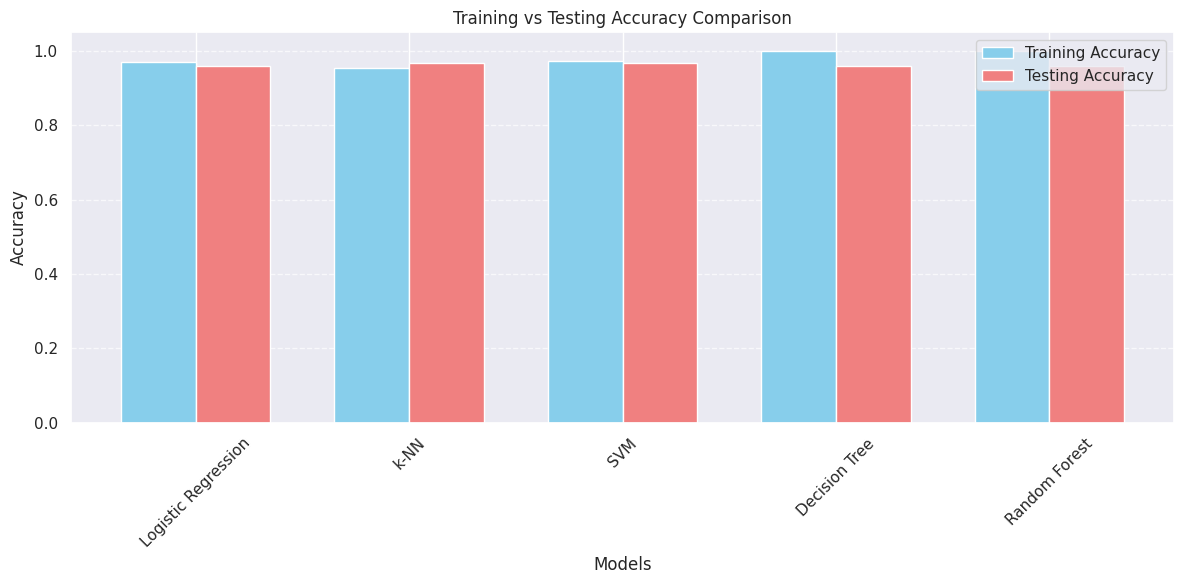

In [22]:
# Plot training vs testing accuracy comparison
plot_train_test_comparison(
    train_test_comparison['train_accuracies'],
    train_test_comparison['test_accuracies'],
    train_test_comparison['model_names']
)

In [23]:
# Create final comparison DataFrame
metrics_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Training Accuracy': [f"{results[m]['Mean Train Accuracy']:.4f} (±{results[m]['Std Train Accuracy']:.4f})" for m in results],
    'Testing Accuracy': [f"{results[m]['Mean Test Accuracy']:.4f} (±{results[m]['Std Test Accuracy']:.4f})" for m in results],
    'Precision': [f"{results[m]['Mean Precision']:.4f} (±{results[m]['Std Precision']:.4f})" for m in results],
    'Recall': [f"{results[m]['Mean Recall']:.4f} (±{results[m]['Std Recall']:.4f})" for m in results],
    'F1 Score': [f"{results[m]['Mean F1']:.4f} (±{results[m]['Std F1']:.4f})" for m in results]
})

In [24]:
# Sort by F1 Score
metrics_df = metrics_df.sort_values(by='F1 Score', ascending=False)

print("\nFinal Model Comparison:")
print("=" * 100)
print(metrics_df.to_string(index=False))


Final Model Comparison:
              Model Training Accuracy Testing Accuracy        Precision           Recall         F1 Score
                SVM  0.9732 (±0.0098) 0.9664 (±0.0298) 0.9671 (±0.0298) 0.9664 (±0.0298) 0.9665 (±0.0298)
               k-NN  0.9530 (±0.0114) 0.9664 (±0.0298) 0.9691 (±0.0277) 0.9664 (±0.0298) 0.9663 (±0.0299)
Logistic Regression  0.9698 (±0.0085) 0.9598 (±0.0388) 0.9611 (±0.0378) 0.9598 (±0.0388) 0.9598 (±0.0387)
      Decision Tree  1.0000 (±0.0000) 0.9595 (±0.0392) 0.9631 (±0.0366) 0.9595 (±0.0392) 0.9596 (±0.0391)
      Random Forest  1.0000 (±0.0000) 0.9595 (±0.0392) 0.9631 (±0.0366) 0.9595 (±0.0392) 0.9596 (±0.0391)


### **SVM Model**

In [25]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 119
Testing set size: 30


In [26]:
# Convert y_train to a pandas DataFrame with a single column
y_train_df = pd.DataFrame(y_train, columns=['species'])

# Now you can access the value counts of the 'species' column
print("\nValue counts for species:")
print(y_train_df['species'].value_counts())


Value counts for species:
species
0    40
1    40
2    39
Name: count, dtype: int64


In [27]:
# Convert y_test to a pandas DataFrame with a single column
y_test_df = pd.DataFrame(y_test, columns=['species'])

# Now you can access the value counts of the 'species' column
print("\nValue counts for species:")
print(y_test_df['species'].value_counts())


Value counts for species:
species
1    10
2    10
0    10
Name: count, dtype: int64


In [28]:
# Initialize and train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [29]:
# Make predictions on both training and test sets
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

In [30]:
# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [31]:
# Calculate other metrics for test set
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

In [32]:
# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

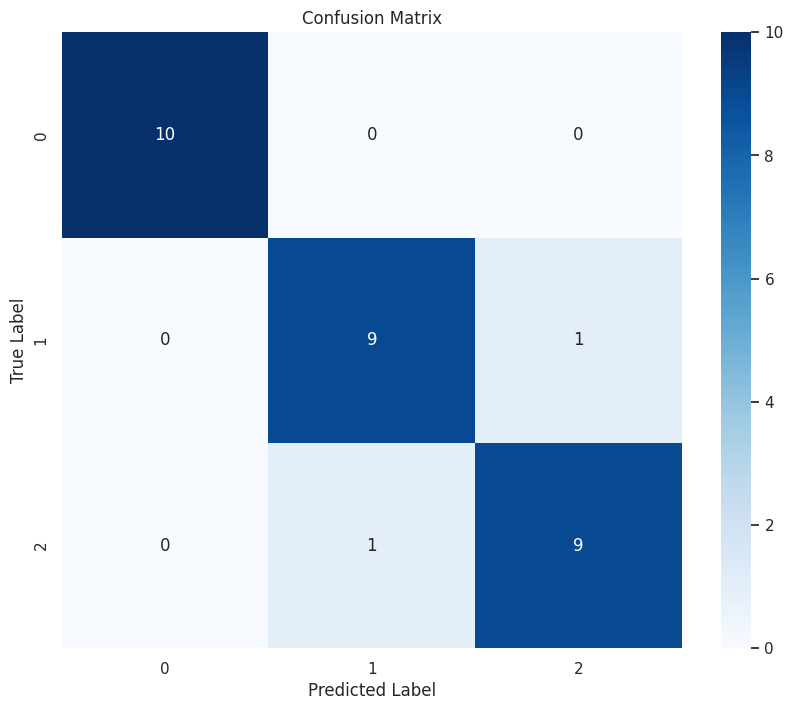

In [33]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [34]:
# Print all metrics
print("\nModel Performance Metrics:")
print("=" * 50)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")


Model Performance Metrics:
Training Accuracy: 0.9748
Testing Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333
F1 Score: 0.9333


In [35]:
# Print detailed classification report
from sklearn.metrics import classification_report

print("\nDetailed Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_test_pred))


Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



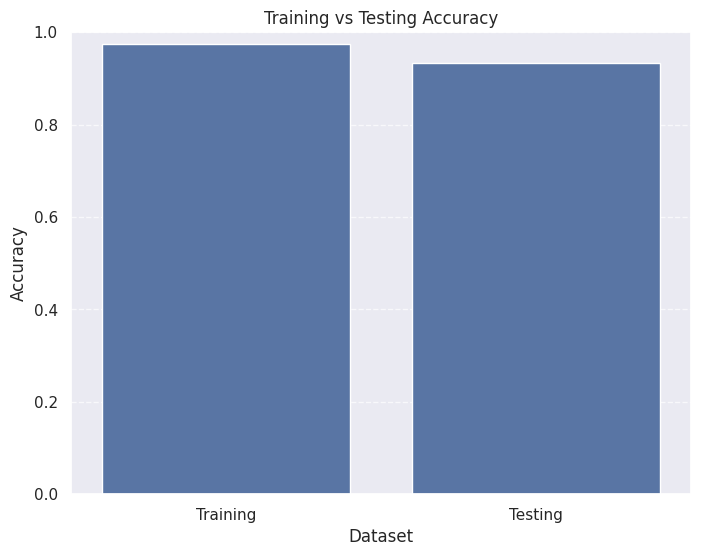

In [36]:
# Create a bar plot comparing training and testing accuracy
plt.figure(figsize=(8, 6))
accuracies = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Accuracy': [train_accuracy, test_accuracy]
})
sns.barplot(x='Dataset', y='Accuracy', data=accuracies)
plt.title('Training vs Testing Accuracy')
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Hyper parameter Tunning**

In [37]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Function to plot parameter comparison
def plot_param_comparison(grid_results, param_name, title):
    plt.figure(figsize=(10, 6))
    means = grid_results.cv_results_['mean_test_score']
    stds = grid_results.cv_results_['std_test_score']
    params = grid_results.cv_results_['param_' + param_name]

    plt.plot(params, means, 'o-', label='Mean CV Score')
    plt.fill_between(params, means - stds, means + stds, alpha=0.2)
    plt.xlabel(param_name)
    plt.ylabel('Cross-validation Score')
    plt.title(f'{title} vs Cross-validation Score')
    plt.grid(True)
    plt.legend()
    plt.show()

In [38]:
# 1. Grid Search CV
print("Performing Grid Search CV...")
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Performing Grid Search CV...
Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [39]:
# Print Grid Search results
print("\nGrid Search Results:")
print("=" * 50)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


Grid Search Results:
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.9833


In [40]:
# Create best model from Grid Search
best_grid_model = grid_search.best_estimator_
grid_y_pred = best_grid_model.predict(X_test)

print("\nGrid Search Best Model Performance on Test Set:")
print("=" * 50)
print(classification_report(y_test, grid_y_pred))


Grid Search Best Model Performance on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [41]:
# 2. Random Search CV
from scipy.stats import uniform, loguniform

print("\nPerforming Random Search CV...")
param_distributions = {
    'C': loguniform(1e-2, 1e3),
    'gamma': loguniform(1e-4, 1e0),
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

random_search = RandomizedSearchCV(
    SVC(random_state=42),
    param_distributions,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)


Performing Random Search CV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=SVC(random_state=42), n_iter=20, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c5211e828f0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c52109f5e40>,
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid']},
                   random_state=42, scoring='accuracy', verbose=1)

In [42]:
# Print Random Search results
print("\nRandom Search Results:")
print("=" * 50)
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}")


Random Search Results:
Best parameters: {'C': 110.15056790269621, 'gamma': 0.001653693718282443, 'kernel': 'rbf'}
Best cross-validation score: 0.9667


In [43]:
# Create best model from Random Search
best_random_model = random_search.best_estimator_
random_y_pred = best_random_model.predict(X_test)

print("\nRandom Search Best Model Performance on Test Set:")
print("=" * 50)
print(classification_report(y_test, random_y_pred))


Random Search Best Model Performance on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [44]:
# Compare different kernels performance
kernel_comparison = pd.DataFrame({
    'Kernel': [],
    'Mean CV Score': [],
    'Std CV Score': []
})

for kernel in param_grid['kernel']:
    kernel_scores = [score for params, score in zip(grid_search.cv_results_['params'],
                                                  grid_search.cv_results_['mean_test_score'])
                    if params['kernel'] == kernel]
    kernel_comparison = pd.concat([kernel_comparison, pd.DataFrame({
        'Kernel': [kernel],
        'Mean CV Score': [np.mean(kernel_scores)],
        'Std CV Score': [np.std(kernel_scores)]
    })])

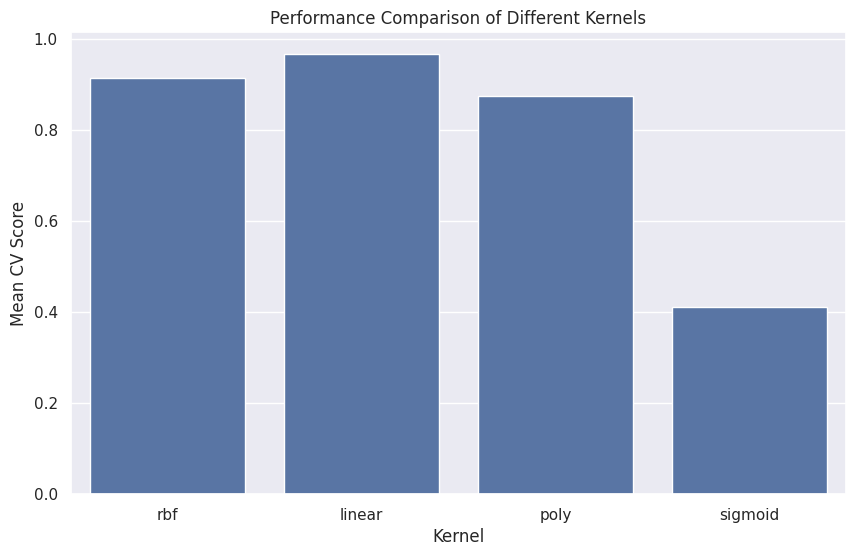

In [45]:
# Plot kernel comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Kernel', y='Mean CV Score', data=kernel_comparison)
plt.title('Performance Comparison of Different Kernels')
plt.grid(True, axis='y')
plt.show()

In [46]:
# Create final comparison table
final_comparison = pd.DataFrame({
    'Model': ['Base SVM', 'Grid Search Best', 'Random Search Best'],
    'Test Accuracy': [
        accuracy_score(y_test, SVC(random_state=42).fit(X_train, y_train).predict(X_test)),
        accuracy_score(y_test, grid_y_pred),
        accuracy_score(y_test, random_y_pred)
    ]
})

print("\nFinal Model Comparison:")
print("=" * 50)
print(final_comparison)


Final Model Comparison:
                Model  Test Accuracy
0            Base SVM       0.933333
1    Grid Search Best       1.000000
2  Random Search Best       1.000000


In [47]:
# Save the best model parameters
best_params = {
    'Grid Search': grid_search.best_params_,
    'Random Search': random_search.best_params_
}

In [48]:
print("\nBest Parameters Summary:")
print("=" * 50)
for search_type, params in best_params.items():
    print(f"\n{search_type}:")
    for param, value in params.items():
        print(f"{param}: {value}")


Best Parameters Summary:

Grid Search:
C: 1
gamma: scale
kernel: linear

Random Search:
C: 110.15056790269621
gamma: 0.001653693718282443
kernel: rbf


In [49]:
# Best parameters from our hyperparameter tuning
best_params = {
    'C':  1,
    'gamma': 'scale',
    'kernel': 'linear',
    'random_state': 42
}

In [50]:
# Create and train the best model
best_model = SVC(**best_params)
best_model.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [51]:
# Make predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [52]:
# Calculate accuracy scores
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

print("Model Performance:")
print("=" * 50)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Model Performance:
Training Accuracy: 0.9832
Testing Accuracy: 1.0000


In [53]:
# Combine the training and testing sets into DataFrames for comparison
train_df = pd.DataFrame(X_train)
test_df = pd.DataFrame(X_test)

# Check for overlapping rows
overlap = train_df.merge(test_df, how='inner')
if not overlap.empty:
    print("Overlapping samples found:")
    print(overlap)
else:
    print("No overlapping samples.")

No overlapping samples.


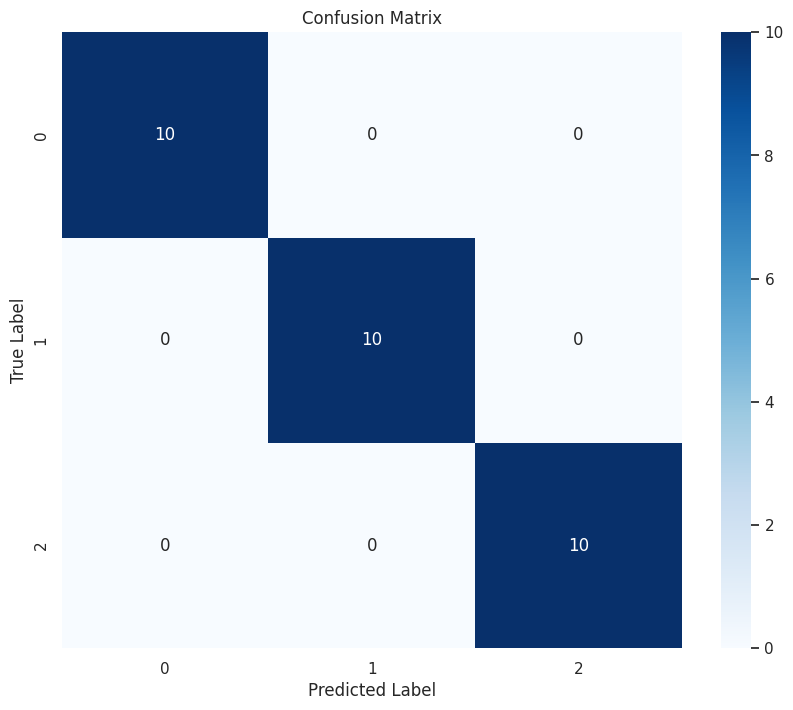

In [54]:
# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [55]:
# Print classification report
print("\nClassification Report:")
print("=" * 50)
print(classification_report(y_test, y_test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### **Save the Model**

In [56]:
import joblib

# Save the model using joblib
joblib_file = "svc_model.pkl"
joblib.dump(best_model, joblib_file)
print(f"Model saved to {joblib_file}.")

Model saved to svc_model.pkl.


In [57]:

# Load the model and test with manual data
loaded_model = joblib.load(joblib_file)
manual_test = np.array([[5.5, 2.5, 3.0, 1.0]])  # Example input
prediction = loaded_model.predict(manual_test)
predicted_class = iris.target_names[prediction[0]]

In [58]:
print("\nManual Test Case Prediction:")
print("=" * 50)
print(f"Input: {manual_test}")
print(f"Predicted Class: {predicted_class}")


Manual Test Case Prediction:
Input: [[5.5 2.5 3.  1. ]]
Predicted Class: versicolor
